Exploramos el archivo descargado

In [59]:
import pandas as pd

df = pd.read_csv("data/sales_data.csv")



Exploracion Inicial

In [60]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB
None


In [61]:
print(df.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

In [62]:
print(df.describe())

          Unnamed: 0       Order ID  Quantity Ordered     Price Each  \
count  185950.000000  185950.000000     185950.000000  185950.000000   
mean     8340.388475  230417.569379          1.124383     184.399735   
std      5450.554093   51512.737110          0.442793     332.731330   
min         0.000000  141234.000000          1.000000       2.990000   
25%      3894.000000  185831.250000          1.000000      11.950000   
50%      7786.000000  230367.500000          1.000000      14.950000   
75%     11872.000000  275035.750000          1.000000     150.000000   
max     25116.000000  319670.000000          9.000000    1700.000000   

               Month          Sales           Hour  
count  185950.000000  185950.000000  185950.000000  
mean        7.059140     185.490917      14.413305  
std         3.502996     332.919771       5.423416  
min         1.000000       2.990000       0.000000  
25%         4.000000      11.950000      11.000000  
50%         7.000000      14.9500

In [63]:
print(df.isnull().sum())

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [64]:
print(df.nunique())

Unnamed: 0           25093
Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Month                   12
Sales                   53
City                     9
Hour                    24
dtype: int64


Estructura del dataset

- Tiene 185,950 registros y 11 columnas.

- No hay valores nulos (según .info()).

- Order Date es tipo object, hay que convertirlo a datetime.

- Sales parece estar bien, pero hay que revisar los valores máximos y mínimos.

- Unnamed: 0 es un índice, se puede eliminar.

Datos interesantes

- Máximo de productos por orden: 9

- Máximo de ventas en una orden: $3,400.00

- Ciudades con ventas: 9 ciudades en total.

- Fechas: Hay registros de enero a diciembre de 2019.

Limpiar datos

In [65]:
# Eliminar columna innecesaria
df.drop(columns=["Unnamed: 0"], inplace= True)

# Convertir Fechas

df["Order Date"] = pd.to_datetime(df["Order Date"], errors = "coerce")

Analisis Exploratorio

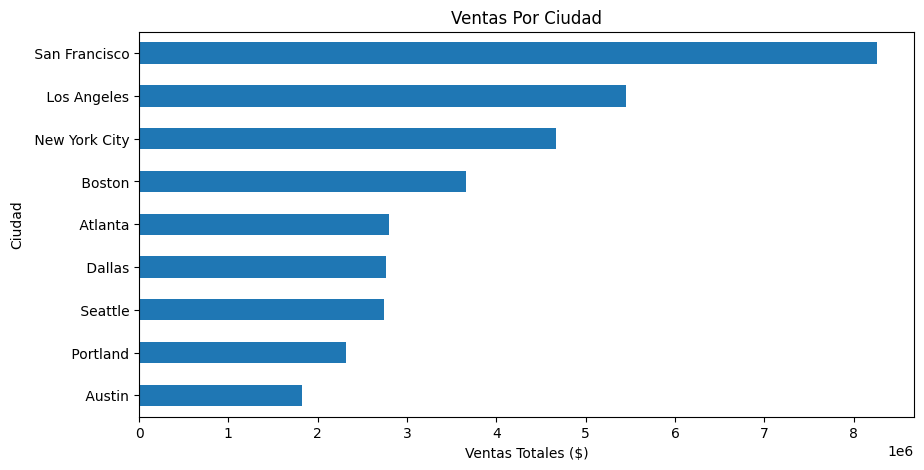

In [66]:
import matplotlib.pyplot as plt

ventas_por_ciudad = df.groupby("City")["Sales"].sum().sort_values()
ventas_por_ciudad.plot(kind="barh", title= "Ventas Por Ciudad", figsize=(10,5))
plt.xlabel("Ventas Totales ($)")
plt.ylabel("Ciudad")
plt.show()

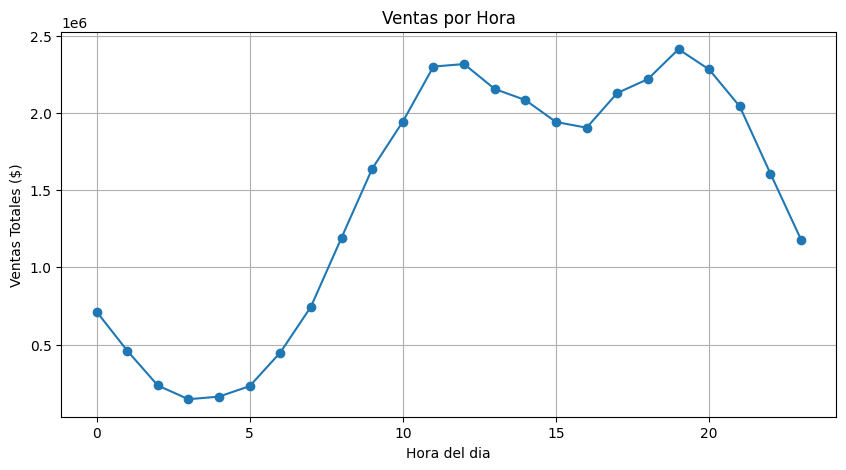

In [67]:
ventas_por_hora = df.groupby("Hour")["Sales"].sum()
ventas_por_hora.plot(kind="line", marker = "o", title= "Ventas por Hora", figsize=(10,5))
plt.xlabel("Hora del dia")
plt.ylabel("Ventas Totales ($)")
plt.grid()
plt.show()

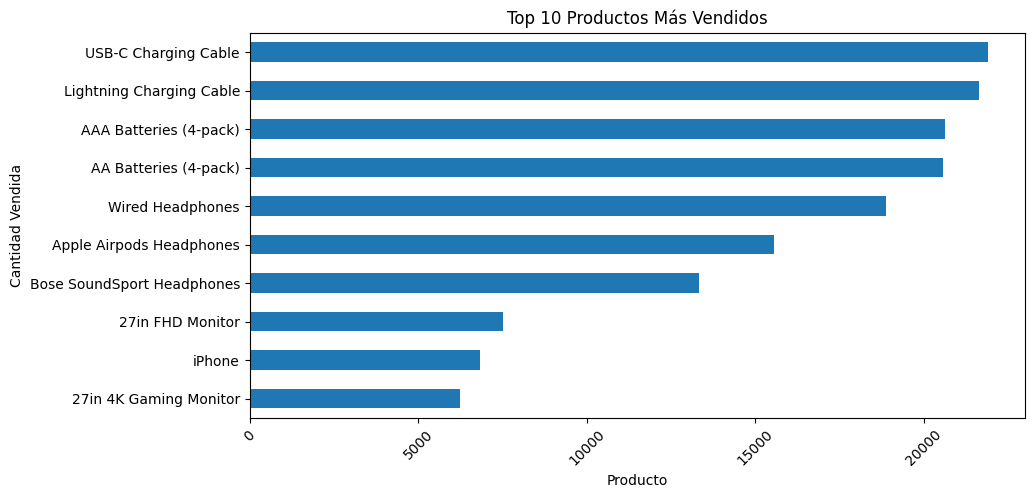

In [68]:
top_productos = df["Product"].value_counts().head(10).sort_values()
top_productos.plot(kind="barh", title="Top 10 Productos Más Vendidos", figsize=(10,5))
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.show()


Exportamos para analizar en PowerBI

In [69]:
df.to_csv("data/sales_data_clean.csv", index=False)  # CSV